In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Load the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and prepare it for classification with Neural Network

In [2]:
digits_img = tf.keras.datasets.mnist # The MNIST dataset can be loaded directly within tensorflow

(x_train, y_train), (x_test, y_test) = digits_img.load_data() # Divide into train and test sets

In [3]:
# Size of test and train sets
print(f"train size: {len(x_train)}\ntest size:  {len(x_test)}")

train size: 60000
test size:  10000


In [4]:
# Every train sample is an image of 28x28 pixel
x_train[0].shape

(28, 28)

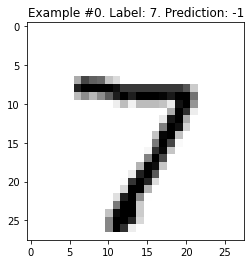

In [5]:
# create support funtion to display images
def display_image(images_repo, labels_repo, image_pos, pred=-1):
    img = images_repo[image_pos].squeeze()
    plt.title(f"Example #{image_pos}. Label: {labels_repo[image_pos]}. Prediction: {pred}")
    plt.imshow(img, cmap=plt.cm.gray_r)
display_image(x_test, y_test, 0)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

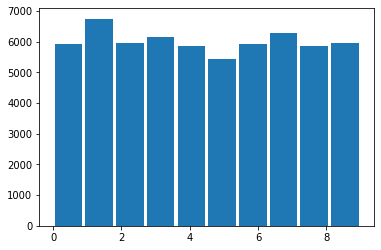

In [6]:
# Verify the distribution of the train set to check for imbalances
plt.hist(y_train, bins=10, rwidth=.9)

In [7]:
x_train = x_train / 255.0 # normalize input train data
x_test = x_test / 255.0 # normalize input test data

In [8]:
# Reshapes the matrix of inputs from (28,28) to (28,28,1)
# This is necessary for input in Conv2D layer 
x_train = x_train.reshape(len(x_train),28,28,1);
x_test = x_test.reshape(len(x_test),28,28,1) 
x_test.shape

(10000, 28, 28, 1)

In [9]:
# Using keras, we can recreate the LeNet5 convolutional NN
# This cNN uses ReLU as activation function of the hidden layers
# The output layer instead uses the softmax function and 10 nodes (digits from 0 to 9)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5, 5), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(16,(5, 5), activation='relu'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
# Use ADAM to train the NN for 5 epochs
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, verbose=2)

# Evaluate model and print results
print("Model evaluation:")
results = model.evaluate(x_test, y_test, verbose=0)
print("test loss, test acc:", results)

Epoch 1/5
1875/1875 - 18s - loss: 0.2211 - accuracy: 0.9325
Epoch 2/5
1875/1875 - 20s - loss: 0.0742 - accuracy: 0.9770
Epoch 3/5
1875/1875 - 19s - loss: 0.0558 - accuracy: 0.9827
Epoch 4/5
1875/1875 - 18s - loss: 0.0425 - accuracy: 0.9866
Epoch 5/5
1875/1875 - 18s - loss: 0.0362 - accuracy: 0.9885
Model evaluation:
test loss, test acc: [0.039334993809461594, 0.986299991607666]


In [11]:
# Calculate the predictions using the test set
pred = np.argmax(model.predict(x_test), 1)

In [12]:
#Verify predictions
cnt = 0
misclass_sample_n = []
for i, p in enumerate(pred):
    if p == y_test[i]:
        continue
    ## print when the prediction doesn't match the label
    #print(f"{i}. {p} --> {y_test[i]}")
    misclass_sample_n.append(i)
    cnt += 1        
print(f"Total errors: {cnt}")
print(f"Total samples: {len(y_test)}")
print(f"Accuracy: {(len(y_test)-cnt)/len(y_test)}")

Total errors: 137
Total samples: 10000
Accuracy: 0.9863


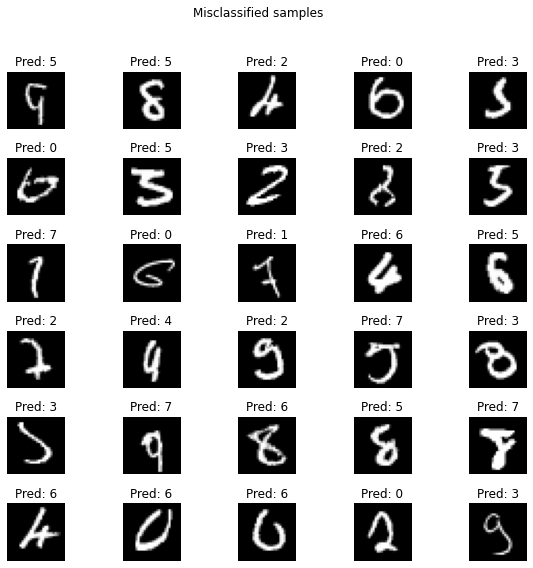

In [13]:
# Plot a few misclassified digits
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(x_test[misclass_sample_n[n]], cmap='gray')
    plt.title(f"Pred: {pred[misclass_sample_n[n]]}")
    plt.axis('off')
    plt.suptitle("Misclassified samples")